In [6]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [7]:
data = pd.read_csv("A:\\dataset\\creditcard.csv\\creditcard.csv")

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
#EXPLORATORY DATA ANALYSIS

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

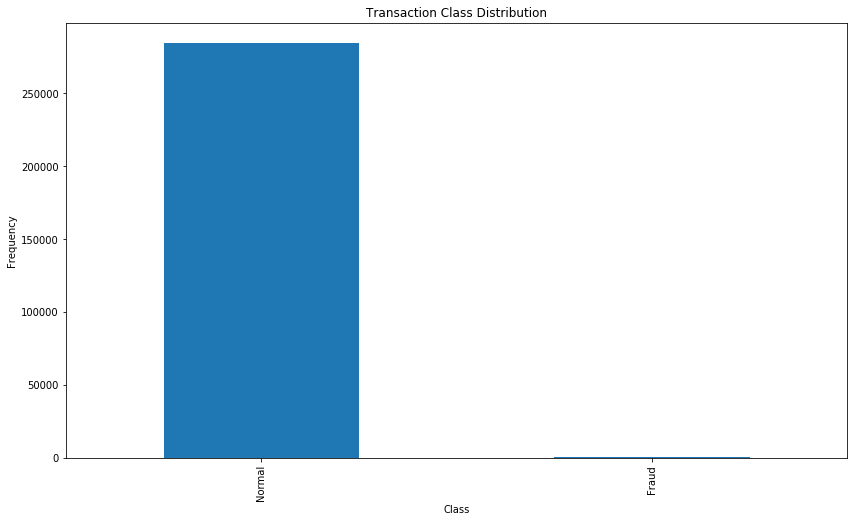

In [17]:
count_classes= pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
##get the Fraud and the normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [19]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
## We need to analyze more amount of information from the transaction data
##how different are the amount of money used in different transaction classes?

In [21]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
normal.Amount..describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

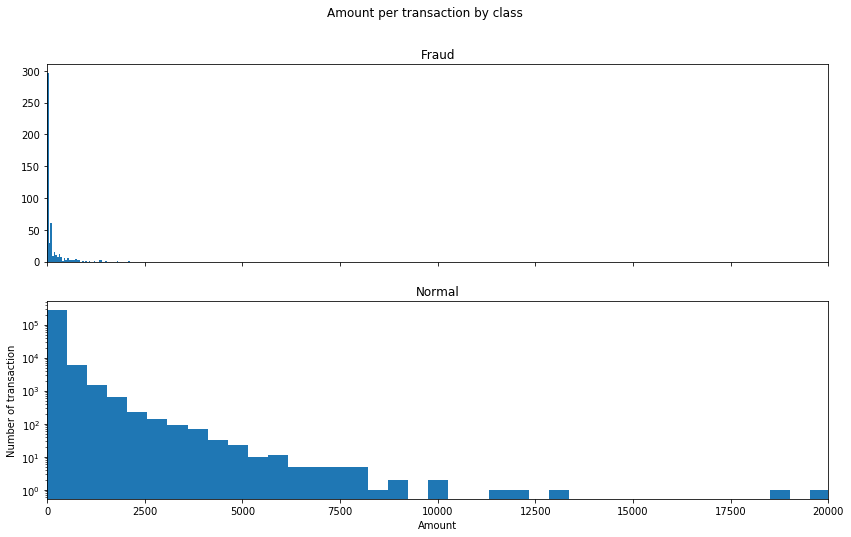

In [28]:
f,(ax1,ax2)=plt.subplots(2, 1, sharex=True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of transaction')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

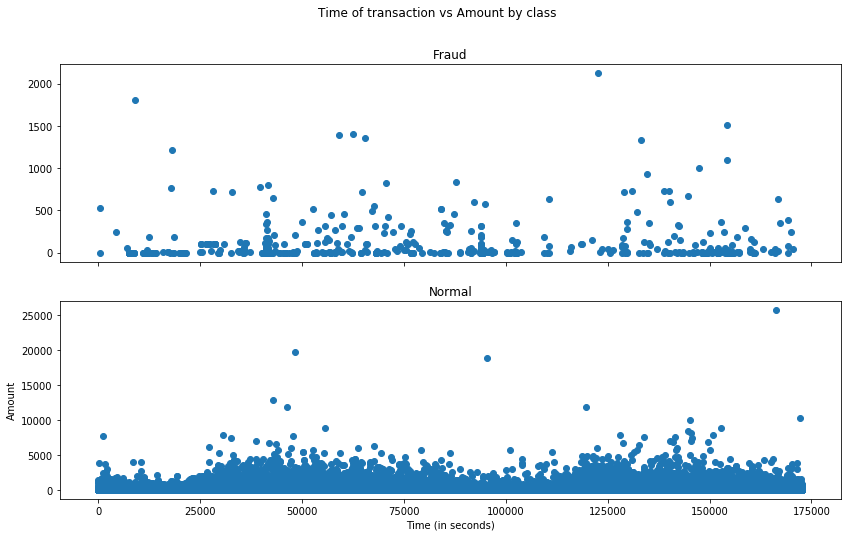

In [29]:
#We will check do fraudulent transaction occur more often during certain time from ? Let us find out with a visual representation
f,(ax1,ax2)=plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by class")
bins = 50
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [32]:
#Outlier fractions

outlier_fraction = len(fraud)/float(len(normal))

In [33]:
outlier_fraction

0.0017304750013189597

In [35]:
print("Fraud Cases : {}".format(len(fraud)))
print("Fraud Cases : {}".format(len(normal)))

Fraud Cases : 492
Fraud Cases : 284315


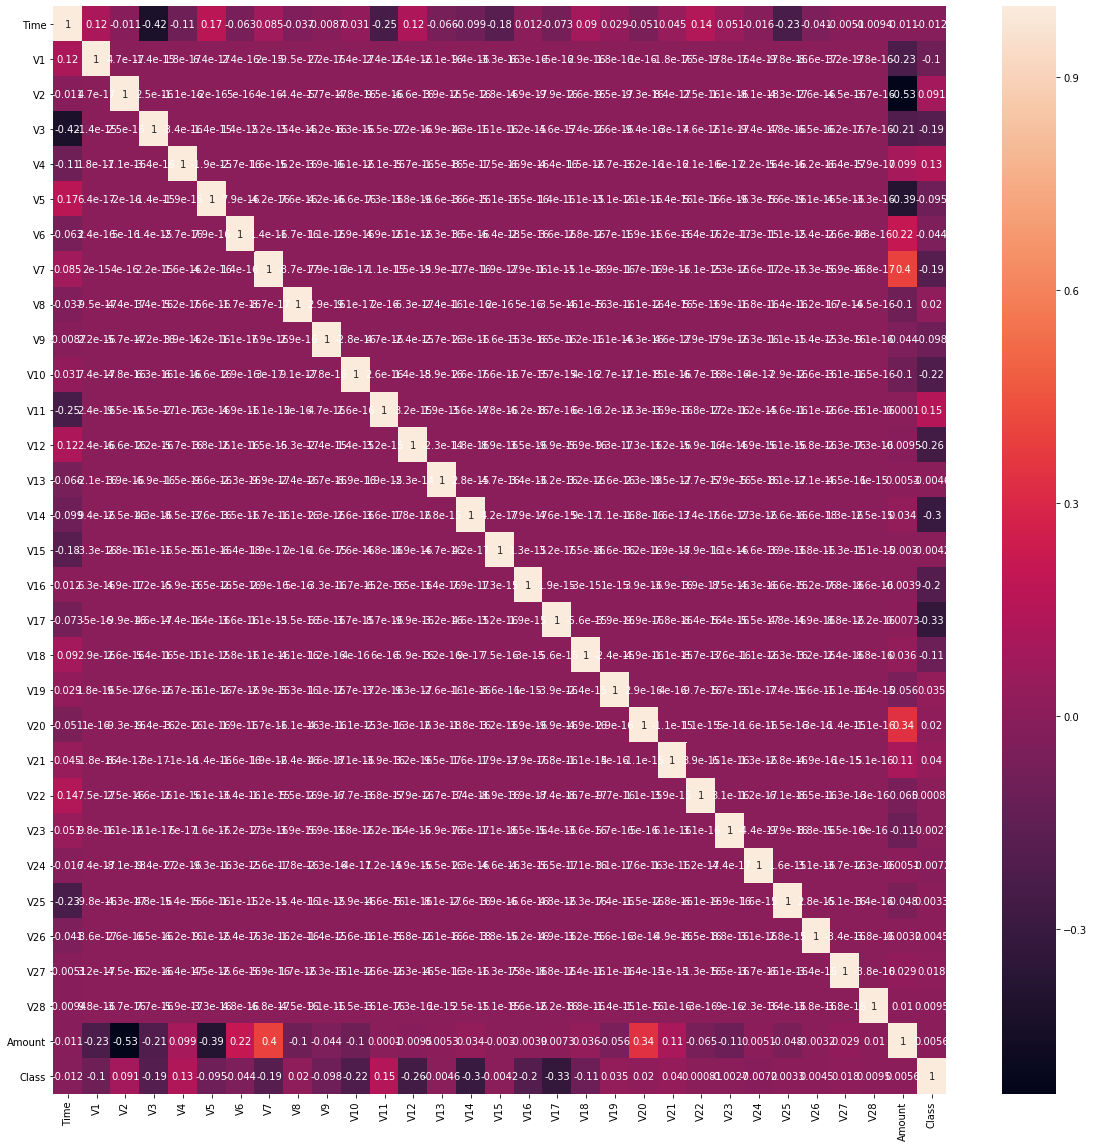

In [38]:
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True)

In [40]:
#Create indepedent and dependent features
columns = data.columns.tolist()
columns = [c for c in columns if c is not ['Class']]
target = 'Class'
state =np.random.RandomState(42)
X=data[columns]
y=data[target]
X_outliers = state.uniform(low=0,high=1,size=(X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(284807, 31)
(284807,)


In [41]:
#Model prediction using Isolation Forest Algorithm it works anomaly score
#Local outlier factor (LOF)algorithm is unsupervised outlier detection method which computes the loacl density deviation of a given data/
#point with respect  to its neigbors


classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30,metric='minkowski'),
    "Support vector Machine":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1,random_state=state)
}


In [43]:
type(classifiers)

dict

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outier Factor':
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name =='Support Vector Machine':
        clf.fit(X)
        y_pred = clf.predict(X)
    else: 
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        #Reshape the values 0 for normal transaction,1 for fraud transactions
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
       

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [ ]:
print("Accuracy Score")
print(accuracy_score(y,y_pred))
print("classification_report")
print(classification_report(y,y_pred))

In [2]:
#using pycaret library
import pandas as pd

In [6]:
df = pd.read_csv("A:\\dataset\\creditcard.csv\\creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
len(df[df['Class']==0])

284315

In [10]:
len(df[df['Class']==1])

492

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [1]:
#using pycaret library
from pycaret.classification import *

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("A:\\dataset\\creditcard.csv\\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
len(df[df['Class']==0])

284315

In [12]:
len(df[df['Class']==1])

492

In [13]:
clf1=setup(data=df,target='Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2738
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9995,0.9549,0.776,0.9455,0.8498,0.8496
1,Extreme Gradient Boosting,0.9995,0.9842,0.78,0.9166,0.839,0.8387
2,CatBoost Classifier,0.9995,0.9809,0.7843,0.9419,0.8546,0.8543
3,Random Forest Classifier,0.9994,0.9271,0.7385,0.9259,0.8163,0.816
4,Linear Discriminant Analysis,0.9994,0.9818,0.7552,0.8696,0.8057,0.8054
5,Ada Boost Classifier,0.9993,0.968,0.6847,0.8747,0.765,0.7647
6,Decision Tree Classifier,0.9991,0.8713,0.743,0.7336,0.7352,0.7347
7,Gradient Boosting Classifier,0.9991,0.7555,0.5765,0.8498,0.6673,0.6669
8,Logistic Regression,0.9989,0.9133,0.6638,0.6935,0.6735,0.673
9,Ridge Classifier,0.9988,0,0.4027,0.8484,0.5401,0.5396


In [15]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9997,0.9640,0.8750,0.9545,0.9130,0.9129
1,0.9996,0.9917,0.8333,0.9091,0.8696,0.8694
2,0.9994,0.9967,0.7917,0.8636,0.8261,0.8258
3,0.9995,0.9788,0.7600,0.9500,0.8444,0.8442
4,0.9995,0.9505,0.7500,0.9474,0.8372,0.8370
5,0.9994,0.9973,0.7500,0.9000,0.8182,0.8179
6,0.9995,0.9540,0.7500,0.9474,0.8372,0.8370
7,0.9998,1.0000,0.8750,1.0000,0.9333,0.9332
8,0.9995,0.9801,0.7083,1.0000,0.8293,0.8290
9,0.9995,0.9957,0.7500,0.9474,0.8372,0.8370


In [16]:
catboost

In [18]:
model=tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9997,0.9746,0.8333,1.0000,0.9091,0.9089
1,0.9996,0.9665,0.8333,0.9091,0.8696,0.8694
2,0.9995,0.9921,0.8333,0.8696,0.8511,0.8508
3,0.9995,0.9600,0.7600,0.9500,0.8444,0.8442
4,0.9995,0.9426,0.7500,0.9474,0.8372,0.8370
5,0.9994,0.9615,0.7083,0.9444,0.8095,0.8092
6,0.9994,0.9477,0.7083,0.9444,0.8095,0.8092
7,0.9998,1.0000,0.8750,1.0000,0.9333,0.9332
8,0.9996,0.9876,0.7500,1.0000,0.8571,0.8569
9,0.9995,0.9730,0.7917,0.9048,0.8444,0.8442


In [29]:
predictions=predict_model(model,data=df)

In [31]:
predictions.head(24)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0,0.0


In [32]:
predictions.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0,0,0.0000
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0,0,0.0000
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0,0,0.0000
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0,0,0.0000
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,0,0.0000
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0,0.0000
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0,0.0000
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0,0.0000
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0,0.0000
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,0,0.0001
